# Inhaltsverzeichnis 

- **Naive Bayes Hausaufgabe - Titanic**
    - **1. Aufgabe: Daten laden**
    - **2. Aufgabe: Preprocessing**
    - **3. Aufgabe: Fehlerhafte Daten entfernen**
    - **4. Aufgabe: Daten analysieren**
    - **5. Aufgabe: Dimension reduzieren**
    - **6. Aufgabe: Daten visualisieren**
    - **7. Aufgabe: Machine Learning**
    - **8. Aufgabe: Features nach Klassen getrennt**


# Naive Bayes Hausaufgabe - Titanic

Diese Hausaufgabe analysiert den [Titanic Datensatz](https://www.kaggle.com/competitions/titanic/overview) und ein Naive Bayes Modell wird trainiert. 


## 1. Aufgabe: Daten laden

- Benutze `pandas`, um die Datei `titanic.csv` aus dem Kursbereich zu laden.
- Verschaffe dir ein Gefühl für die Daten. Welche Spalten gibt es? Wie viele Samples gibt es? 


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.shape

(1309, 9)

In [4]:
data.head()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1308 non-null   float64
 8   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [6]:
data.describe()

,Pclass,Survived,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


Hier ein Überblick über die Bedeutung der einzelnen Features:

- `Survival`: Hat der Passagier überlegt?
     - 0 = Nein 
     - 1 = Ja
- `Pclass`: Die Passagierklasse.
     - 1 = erste Klasse
     - 2 = zweite Klasse 
     - 3 = dritte Klasse.
- `Sex`: Das Geschlecht.
- `Age`: Das Alter.
- `Sibsp`: Die Anzahl der Geschwister an Bord.
- `Parch`: Die Anzahl der Eltern/Kinder an Bord.
- `Name`: Der Name.
- `Fare`: Die Kosten des Tickets.
- `Embarked`: An Bord gegangen 
    - C = Cherbourg; 
    - Q = Queenstown; 
    - S = Southampton)

## 2. Aufgabe: Preprocessing 

- Wir wollen, dass `data` nur aus den Spalten der Features `["Age", "Embarked","Fare","Parch", "Pclass","Sex","SibSp"]` und aus der Spalte `Survived` besteht. (`Survived` wollen wir am Ende vorhersagen, wird also unser Target).

**Außerdem:**
- Ersetze die Werte "female" und "male" in der Spalte `Sex` durch 0 und 1.
- Ersetze die Werte "S","C" und "Q" in der Spalte `Embarked` durch 1, 2 und 3.



**Zur Kontrolle: `data` sollte nun 1309 Zeilen und 8 Spalten haben.**


In [7]:
data.drop("Name",axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [9]:
def wandelGeschlUm(x):    
    if x == "female":
        return 0
    elif x == "male":
        return 1
    
def wandelHafenUm(x):    
    if x == "S":
        return 1
    elif x == "C":
        return 2
    elif x == "Q":
        return 3
    

In [10]:
data["Sex"] = data["Sex"].apply(wandelGeschlUm)
data["Embarked"] = data["Embarked"].apply(wandelHafenUm)

In [11]:
data.sample(5)

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
561,2,0,1,59.0,0,0,13.5000,1.0
492,2,1,1,1.0,0,2,37.0042,2.0
582,2,1,0,12.0,0,0,15.7500,1.0
173,1,0,1,32.5,0,0,211.5000,2.0
223,1,0,1,NaN,0,0,0.0000,1.0


In [12]:
data.shape

(1309, 8)

## 3. Aufgabe: Fehlerhafte Daten entfernen

- Entferne alle Samples mit fehlerhaften Werten. Benutze dafür die Funktion [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) des DataFrames.

**Zur Kontrolle: `data` sollte nun 1043 Zeilen und 8 Spalten haben.**

In [13]:

data.dropna(inplace=True)


In [14]:
data.shape

(1043, 8)

## 4. Aufgabe: Daten analysieren

Kommen wir nun zum interessanten Teil. Wir wollen für die Daten aus `data` eine Korrelationsmatrix erstellen, um herauszufinden, wie die einzelnen Features korreliert sind.

- Berechne die paarweisen Korrelationen mit der Funktion [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) des DataFrames.
- Lass dir diese Matrix mittels einer [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) schön darstellen. Für die Optik *können* folgende Parameter beim Aufruf von `heatmap` gewählt werden:
    - `annot=True`
    - `fmt=".2f"`
    - `linewidth=0.2`
    
Diese Parameter sind jedoch nur eine Empfehlung. Probiere selbst verschiedene Möglichkeiten die Heatmap zu gestalten.

- Welche Features sind stark korreliert?

> <span style="color:green"> **_ERINNERUNG:_** </span> Ein Feature ist stark **positiv** korreliert, je näher die Zahl an 1 ist und stark **negativ** korreliert, je näher die Zahl an -1 ist.
- Schreibe die Erkenntnisse, die man aus der Korrelationsmatrix gewinnen kann, auf.


In [15]:

data.corr()


,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,-0.317737,0.141032,-0.409082,0.046333,0.016342,-0.564558,-0.113971
Survived,-0.317737,1.000000,-0.536332,-0.057416,-0.011403,0.115436,0.247858,0.108962
Sex,0.141032,-0.536332,1.000000,0.066007,-0.096464,-0.222531,-0.186400,-0.109690
Age,-0.409082,-0.057416,0.066007,1.000000,-0.242345,-0.149311,0.177205,0.050215
SibSp,0.046333,-0.011403,-0.096464,-0.242345,1.000000,0.373960,0.142131,-0.031067
Parch,0.016342,0.115436,-0.222531,-0.149311,0.373960,1.000000,0.217650,-0.036374
Fare,-0.564558,0.247858,-0.186400,0.177205,0.142131,0.217650,1.000000,0.172281
Embarked,-0.113971,0.108962,-0.109690,0.050215,-0.031067,-0.036374,0.172281,1.000000


In [16]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()


<Axes: >

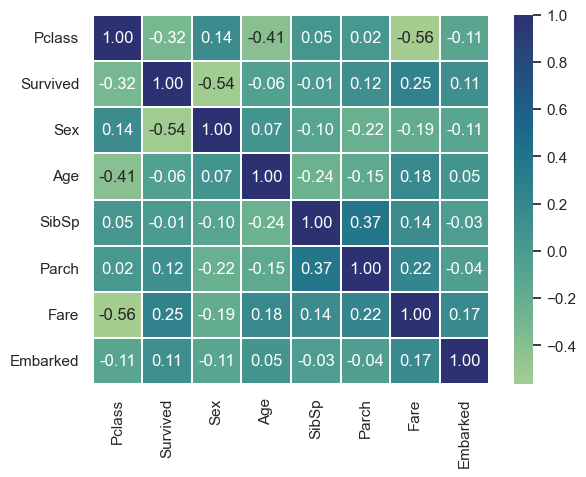

In [17]:

sns.heatmap(data.corr(),linewidths=0.2,annot=True,fmt=".2f",cmap="crest")


In [18]:
# stärkste correlation: "Pclass" und "Fare" -0.56,
#                       "Survived" und "Sex" -0.54,


# stärkste positive correlation: "Parch" und "SibSp" 0.37,
#                       "Survived" und "Fare" 0.25,
#                       "Parch" und "Fare"  0.22,
#                        "Age" und "Fare"   0.18

## 5. Aufgabe: Dimension reduzieren

Du wirst festgestellt haben, dass die Features `Fare` und `Pclass` stark (negativ) korreliert sind. Dies erscheint logisch, da es 3 Beförderungsklassen auf der Titanic gibt, wobei die erste Klasse die Beste ist.

Eine negative Korrelation zwischen `Fare` und `Pclass` bedeutet nun, dass je **höher** die Klasse, desto **geringer** der Fahrtpreis. Davon war auszugehen!

Da diese Features also etwas redundant sind, wollen wir die Dimension der Daten reduzieren und das Feature `Pclass` komplett entfernen.

- Lösche die Spalte `Pclass` aus `data`.

In [19]:
data.drop("Pclass",axis=1,inplace=True)

In [20]:
data.shape

(1043, 7)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1043 non-null   int64  
 1   Sex       1043 non-null   int64  
 2   Age       1043 non-null   float64
 3   SibSp     1043 non-null   int64  
 4   Parch     1043 non-null   int64  
 5   Fare      1043 non-null   float64
 6   Embarked  1043 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 65.2 KB


## 6. Aufgabe: Daten visualisieren

Wir haben 4 numerische Features `Age`,`Fare`,`Parch` und `SibSp`. 

- Lass dir für jedes dieser Features die Verteilung anzeigen. Erzeuge hierfür einen [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) für jedes Merkmal. 

C:\Users\dietm\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


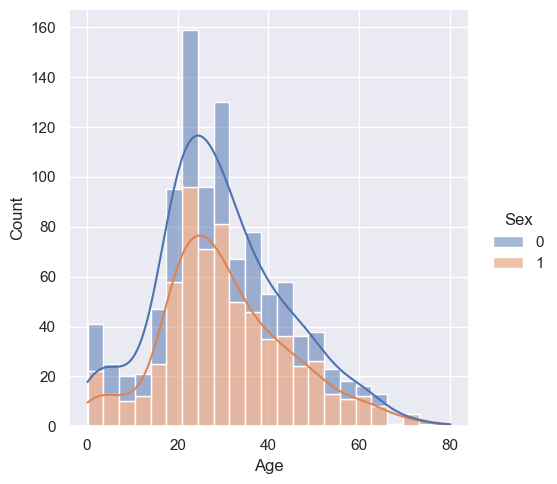

In [22]:

sns.displot(data=data,x="Age",hue="Sex",multiple='stack', element='bars',kde=True)


C:\Users\dietm\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


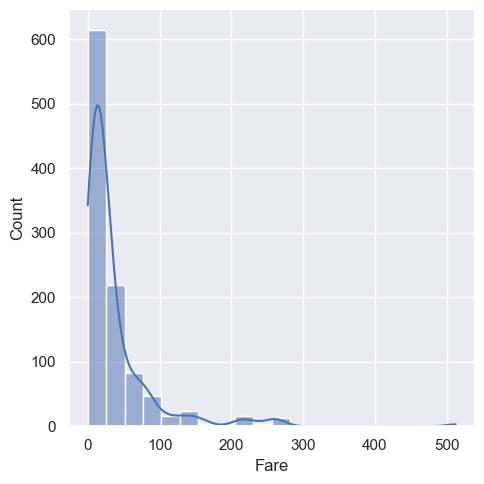

In [23]:
sns.displot(data=data,x="Fare",multiple='stack', element='bars',kde=True,bins=20)

C:\Users\dietm\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


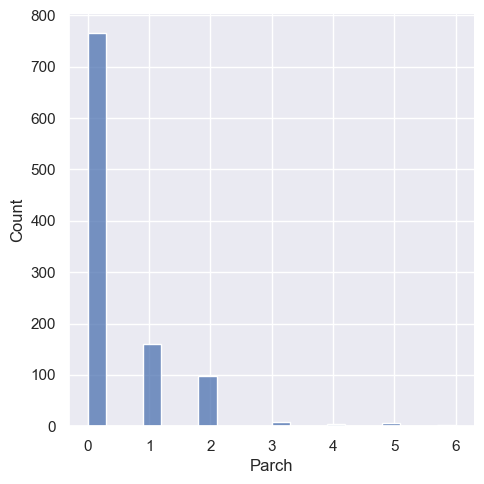

In [24]:
sns.displot(data=data,x="Parch",multiple='stack', element='bars',bins=20)

C:\Users\dietm\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


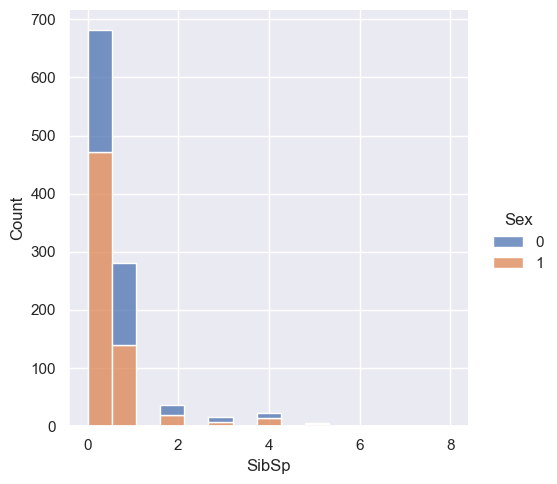

In [25]:
sns.displot(data=data,x="SibSp",hue="Sex",multiple='stack', element='bars',bins=15)

## 7. Aufgabe: Machine Learning

Wir wollen nun ein Modell trainieren. Dazu müssen wir unser Target `Survived` aus dem `DataFrame` `data` entfernen und in einer separaten Variable speichern. 

- Entferne das Target aus `data` und speichere die Werte in einer neuen Variable.

In [26]:
X = data.drop("Survived",axis=1)

In [27]:
X

,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,29.0000,0,0,211.3375,1.0
1,1,0.9167,1,2,151.5500,1.0
2,0,2.0000,1,2,151.5500,1.0
3,1,30.0000,1,2,151.5500,1.0
4,0,25.0000,1,2,151.5500,1.0
...,...,...,...,...,...,...
1301,1,45.5000,0,0,7.2250,2.0
1304,0,14.5000,1,0,14.4542,2.0
1306,1,26.5000,0,0,7.2250,2.0
1307,1,27.0000,0,0,7.2250,2.0


In [28]:
y = data["Survived"]

In [29]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1301    0
1304    0
1306    0
1307    0
1308    0
Name: Survived, Length: 1043, dtype: int64

Wir wollen nun ein Modell trainieren:

- Splitte die Daten mit der Funktion [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) im Verhältnis 80:20.
- Trainiere eine [Naive Bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) auf den Trainingsdaten.

> <span style="color:red"> **_WICHTIG:_** </span> `sklearn` bietet mehrere möglichen Modelle. Verwende für diese Aufgabe einen [`Gaussian Naive Bayes`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB). Wir werden in der nächsten Aufgabe auf ein Attribut zugreifen müssen, welches nur dieses Modell besitzt.


- Berechne für dieses Modell den Score auf den Testdaten.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
gnb = GaussianNB()

In [34]:
gnb.fit(X_train,y_train)

GaussianNB()

In [35]:
pred = gnb.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       126
           1       0.72      0.72      0.72        83

    accuracy                           0.78       209
   macro avg       0.77      0.77      0.77       209
weighted avg       0.78      0.78      0.78       209



In [38]:
print("Genauigkeit : {:.3f} %".format(accuracy_score(y_test,pred)*100))

Genauigkeit : 77.990 %


In [39]:
confusion_matrix(y_test,pred)

array([[103,  23],
       [ 23,  60]], dtype=int64)

In [40]:
print("Genauigkeit : {:.3f} %".format(mean_absolute_error(y_test,pred)*100))

Genauigkeit : 22.010 %


<Axes: >

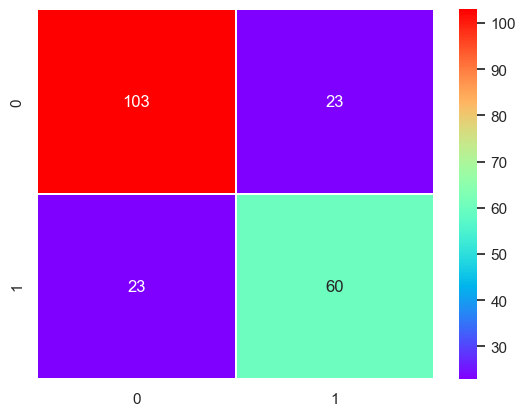

In [41]:
sns.heatmap(confusion_matrix(y_test,pred),linewidths=0.2,annot=True,cmap="rainbow",fmt=".0f")

## 8. Aufgabe: Features nach Klassen getrennt

Unter dem Attribut `theta_[0]` des Modells befinden sich die Mittelwerte der Features für alle Samples die **nicht** überlebt haben (`Survived=0`). </br>
Unter dem Attribut `theta_[1]` befinden sich die Mittelwerte der Features für alle Samples die überlebt haben (`Survived=1`). 

- Lass dir diese Daten durch eine formatierte `print`-Ausgabe schön darstellen. 

- Was lassen sich die Ergebnisse interpretieren? 

In [42]:
for i,k in zip(X.columns[::1],gnb.theta_[0]):
    print(f"Nicht überlebt:      {i:<10}: {k:>10.3f}")

Nicht überlebt:      Sex       :      0.843
Nicht überlebt:      Age       :     30.990
Nicht überlebt:      SibSp     :      0.453
Nicht überlebt:      Parch     :      0.307
Nicht überlebt:      Fare      :     24.780
Nicht überlebt:      Embarked  :      1.266


In [43]:
for i,k in zip(X.columns[::1],gnb.theta_[1]):
    print(f"Überlebt:      {i:<10}: {k:>10.3f}")

Überlebt:      Sex       :      0.319
Überlebt:      Age       :     29.465
Überlebt:      SibSp     :      0.488
Überlebt:      Parch     :      0.518
Überlebt:      Fare      :     54.011
Überlebt:      Embarked  :      1.406
